In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\Homi Dhumal\OneDrive\Desktop\IBM skillsbuild internship\Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


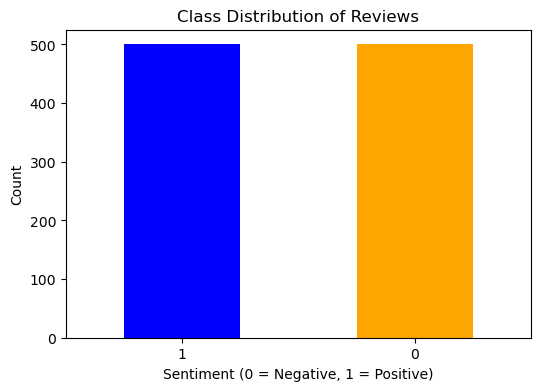

In [7]:
import matplotlib.pyplot as plt

data['Liked'].value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
plt.title('Class Distribution of Reviews')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Data Wragling

In [10]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to C:\Users\Homi
[nltk_data]     Dhumal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus = []

for i in range(0,1000):

  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [ word for word in review_words if not word in set(stopwords.words('english'))]
  review = [ps().stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

corpus[:1000]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[: ,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_predict = classifier.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 77.22772277227723%
The recall score for the model is 78.0%


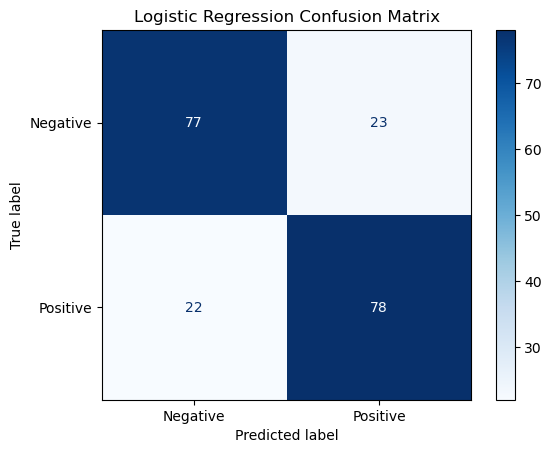

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predict)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## Testing with random inputs.

In [30]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)
     

In [32]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Re-train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

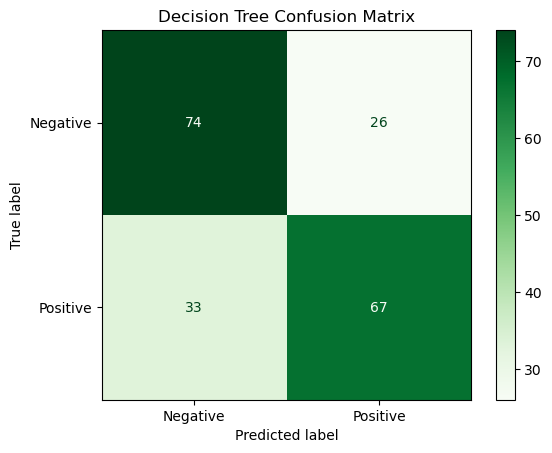

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the decision tree
y_predict = clf.predict(X_test)

# Generate the confusion matrix
cm_tree = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Negative', 'Positive'])
disp_tree.plot(cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 70.5%
The precision score for the model is 72.04301075268818%
The recall score for the model is 67.0%


## Testing model with Random Inputs

In [42]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)
     

In [44]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1
     

The review 1 is Positive
The review 2 is Positive
The review 3 is Positive
The review 4 is Negative


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
# Re-train the Decision Tree model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

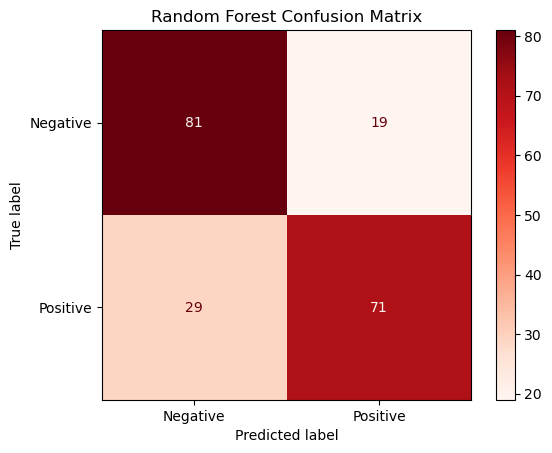

In [51]:
y_predict = clf.predict(X_test)

# Generate the confusion matrix
cm_tree = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Negative', 'Positive'])
disp_tree.plot(cmap='Reds')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [53]:
score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 76.0%
The precision score for the model is 78.88888888888889%
The recall score for the model is 71.0%


## Testing with some Random Inputs

In [102]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [104]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1
     


The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive


# KNeighboursClassifier


In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [109]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
y_predict = classifier.predict(X_test)

In [115]:
score1 = accuracy_score(y_test, y_predict)
score2 = precision_score(y_test, y_predict)  
score3 = recall_score(y_test, y_predict)  


print(f"The accuracy score for the model is {score1*100:.2f}%")
print(f"The precision score for the model is {score2*100:.2f}%")
print(f"The recall score for the model is {score3*100:.2f}%")


The accuracy score for the model is 63.50%
The precision score for the model is 69.57%
The recall score for the model is 48.00%


In [117]:
cm_knn = confusion_matrix(y_test, y_predict)


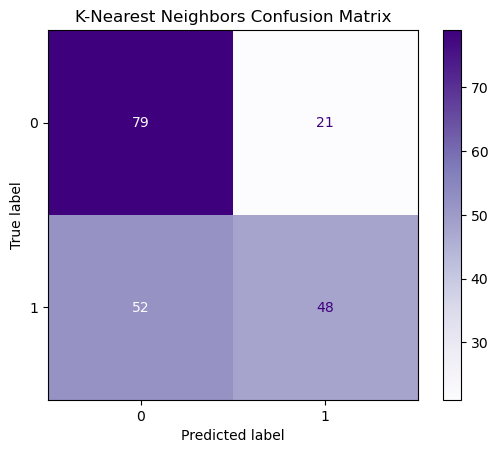

In [119]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y_test))  
disp_knn.plot(cmap='Purples')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

## Testing with some random inputs.

In [121]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [123]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Negative
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# SVC

In [127]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [129]:
y_predict = classifier.predict(X_test)

In [131]:
cm_svc = confusion_matrix(y_test, y_predict)

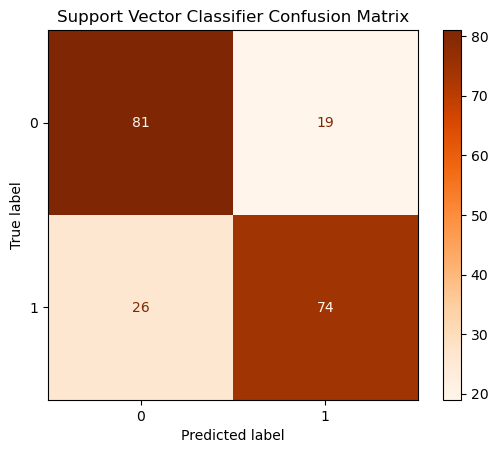

In [133]:
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=np.unique(y_test))  # Using target_names for the labels
disp_svc.plot(cmap='Oranges')  # Customize colormap as needed
plt.title('Support Vector Classifier Confusion Matrix')
plt.show()

In [135]:
score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 79.56989247311827%
The recall score for the model is 74.0%


## Testing with some random inputs

In [137]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [139]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# Conclusion

Support Vector Classifier Algorithm and Logistic Regression Classifier Algorithm are the best algorithm amongst all the algorithm used for this dataset with the highest accuracy score of 77.5%.
KNeighbours Classifier Algorithm is the worst algorithm amongst all the algorithm used for this dataset with the lowest accuracy score of 63.50%.